# Analysis of Covariance

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Single-factor-Analysis" data-toc-modified-id="Single-factor-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Single-factor Analysis</a></span><ul class="toc-item"><li><span><a href="#ANOVA-model" data-toc-modified-id="ANOVA-model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ANOVA model</a></span></li><li><span><a href="#ANCOVA-model" data-toc-modified-id="ANCOVA-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>ANCOVA model</a></span></li><li><span><a href="#Partial-F-test-for-treatment-effects" data-toc-modified-id="Partial-F-test-for-treatment-effects-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Partial F-test for treatment effects</a></span></li><li><span><a href="#Covariance-of-estimators" data-toc-modified-id="Covariance-of-estimators-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Covariance of estimators</a></span></li></ul></li><li><span><a href="#Two-factor--Analysis" data-toc-modified-id="Two-factor--Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Two-factor  Analysis</a></span><ul class="toc-item"><li><span><a href="#Model-fitting" data-toc-modified-id="Model-fitting-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Model fitting</a></span></li><li><span><a href="#Covariance-matrix-of-estimators" data-toc-modified-id="Covariance-matrix-of-estimators-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Covariance matrix of estimators</a></span></li></ul></li></ul></div>

In [1]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm



%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


## Single-factor Analysis

In [3]:
cracker_data = pd.read_excel('data/lect06-ancova.xlsx', sheet_name='Cracker')
cracker_data

,PromotionSold,PreviousSold,Promotion,Store
0,38,21,1,1
1,39,26,1,2
2,36,22,1,3
3,45,28,1,4
4,33,19,1,5
5,43,34,2,1
6,38,26,2,2
7,38,29,2,3
8,27,18,2,4
9,34,25,2,5


In [4]:
def codingfunc(x):
    if x == 1:
        return (1,0)
    elif x == 2:
        return (0,1)
    else:
        return (-1,-1)

cracker_data[['I1', 'I2']] = pd.DataFrame(cracker_data['Promotion'].apply(codingfunc).tolist(), 
                                           index=cracker_data.index)
cracker_data.PreviousSold -= cracker_data.PreviousSold.mean()

In [5]:
cracker_data

,PromotionSold,PreviousSold,Promotion,Store,I1,I2
0,38,-4.0,1,1,1,0
1,39,1.0,1,2,1,0
2,36,-3.0,1,3,1,0
3,45,3.0,1,4,1,0
4,33,-6.0,1,5,1,0
5,43,9.0,2,1,0,1
6,38,1.0,2,2,0,1
7,38,4.0,2,3,0,1
8,27,-7.0,2,4,0,1
9,34,0.0,2,5,0,1


### ANOVA model

In [6]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


formula = 'PromotionSold ~ C(Promotion)'


cracker_lm = ols(formula, data=cracker_data).fit()
aov_table = anova_lm(cracker_lm) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Promotion),2.0,338.8,169.400000,6.608583,0.011612
Residual,12.0,307.6,25.633333,NaN,NaN


### ANCOVA model 

In [7]:
from statsmodels.formula.api import ols

formula = 'PromotionSold ~ I1 + I2 + PreviousSold'
cracker_lm = ols(formula, data=cracker_data).fit()
cracker_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.924   
Dependent Variable: PromotionSold    AIC:                64.7350 
Date:               2021-10-14 10:19 BIC:                67.5672 
No. Observations:   15               Log-Likelihood:     -28.368 
Df Model:           3                F-statistic:        57.78   
Df Residuals:       11               Prob (F-statistic): 5.08e-07
R-squared:          0.940            Scale:              3.5065  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     33.8000    0.4835  69.9079  0.0000  32.7358  34.8642
I1             6.0174    0.7083   8.4961  0.0000   4.4585   7.5763
I2             0.9420    0.6987   1.3483  0.2047  -0.5958   2.4798
PreviousSold   0.8986    0.1026   8.7592  0.0000   0.6728   1.1243
-----------------------------------------------------------------
Omnibus:              3.304        Durbin-Watson:           2.497
Prob(Omnibus):        0.192        Jarque-Bera (JB):        1.380
Skew:                 0.337        Prob(JB):                0.502
Kurtosis:             1.675        Condition No.:           9    
=================================================================

"""

In [8]:
print('MSE (ANCOVA): {:.2f}'.format(cracker_lm.mse_resid))

MSE (ANCOVA): 3.51


In [9]:
def check_linreg_residuals(model):

    kws = dict(color='blue', marker='o', markersize=7, alpha=0.5)
    sns1_kws = dict(marker='o', s=70, alpha=0.5)
    sns2_kws = dict(marker='o', s=7, alpha=0.5)
    
    x = model.resid
    yhat = model.fittedvalues
    
    fig = plt.figure(figsize=(9, 7))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    ax1.scatter(yhat, x, **sns1_kws)
    ax1.set_title('Residuals vs. Fitted values')
    
    n=len(x)
    #sns.residplot(np.linspace(1,n,n), x, ax=ax2, scatter_kws=sns1_kws)
    #ax2.set_title('Sequence plot')
    ax2.scatter(yhat+x, yhat, **sns1_kws)
    ax2.set_title('Actual vs. Fitted values')
      
    # Box plot
    ax3.boxplot(x,showmeans=True)
    ax3.set_title('Boxplot')

    # qq plot
    sm.graphics.qqplot(x,line='q', ax=ax4, **kws)
    ax4.set_title('Normal Q-Q plot')
    plt.tight_layout()

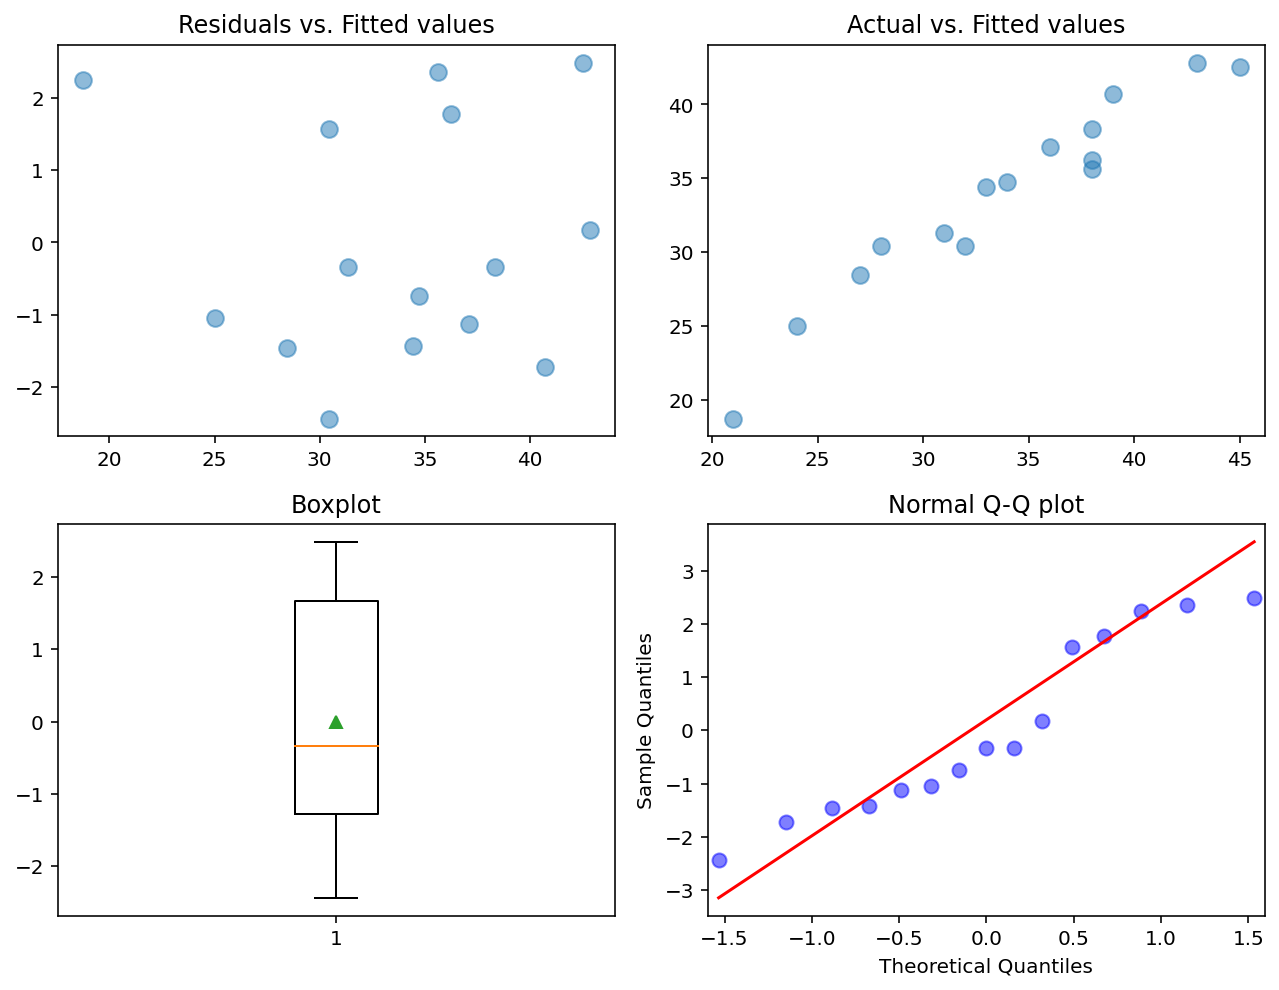

In [10]:
check_linreg_residuals(cracker_lm)

### Partial F-test for treatment effects

In [11]:
cracker_reduced_lm = ols('PromotionSold ~ PreviousSold', data=cracker_data).fit()
cracker_reduced_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.241  
Dependent Variable: PromotionSold    AIC:                97.7757
Date:               2021-10-14 10:20 BIC:                99.1918
No. Observations:   15               Log-Likelihood:     -46.888
Df Model:           1                F-statistic:        5.439  
Df Residuals:       13               Prob (F-statistic): 0.0364 
R-squared:          0.295            Scale:              35.056 
----------------------------------------------------------------
                  Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------
Intercept        33.8000   1.5287 22.1098 0.0000 30.4974 37.1026
PreviousSold      0.7278   0.3121  2.3322 0.0364  0.0536  1.4019
----------------------------------------------------------------
Omnibus:              2.085        Durbin-Watson:          0.378
Prob(Omnibus):        0.353        Jarque-Bera (JB):       1.024
Skew:                 -0.194       Prob(JB):               0.599
Kurtosis:             1.780        Condition No.:          5    
================================================================

"""

In [12]:
print('SSE_k (reduced model): {:.2f} '.format(cracker_reduced_lm.ssr))
print('SSE (full model): {:.2f} '.format(cracker_lm.ssr))
print('MSE (full model): {:.2f} '.format(cracker_lm.mse_resid))

SSE_k (reduced model): 455.72 
SSE (full model): 38.57 
MSE (full model): 3.51 


In [13]:
from scipy import stats
k=2
partial_F0 = ((cracker_reduced_lm.ssr-cracker_lm.ssr)/k)/cracker_lm.mse_resid
print('Test statistic: {:.2f}, P-value: {:.4f}'.format(partial_F0, 
                                                       stats.f.sf(partial_F0, k, cracker_lm.df_resid)))
print('Critical value at 0.05: {:.2f} '.format(stats.f.isf(0.05, k, cracker_lm.df_resid)))

Test statistic: 59.48, P-value: 0.0000
Critical value at 0.05: 3.98 


### Covariance of estimators

In [14]:
import statsmodels.api as sm
from numpy.linalg import inv

Xreg = sm.add_constant(cracker_data[['I1','I2','PreviousSold']]) 
Covmat = cracker_lm.mse_resid*inv(Xreg.T@Xreg)
np.set_printoptions(precision=4)
Covmat

array([[ 0.2338,  0.    ,  0.    ,  0.    ],
       [-0.    ,  0.5016, -0.2603,  0.0189],
       [ 0.    , -0.2603,  0.4882, -0.0147],
       [ 0.    ,  0.0189, -0.0147,  0.0105]])

## Two-factor  Analysis

In [15]:
flower_data = pd.read_excel('data/lect06-ancova.xlsx', sheet_name='Flower')
flower_data

,Sales,Plot,Variety,Moisture,Rep
0,98,15,1,1,1
1,60,4,1,1,2
2,77,7,1,1,3
3,80,9,1,1,4
4,95,14,1,1,5
5,64,5,1,1,6
6,55,4,2,1,1
7,60,5,2,1,2
8,75,8,2,1,3
9,65,7,2,1,4


In [16]:
def codingfunc(x):
    if x == 1:
        return 1
    else:
        return -1
      
flower_data['I1'] = flower_data['Variety'].apply(codingfunc)
flower_data['I2'] = flower_data['Moisture'].apply(codingfunc)
flower_data['I1I2'] = flower_data['I1']*flower_data['I2'] 
flower_data.Plot -= flower_data.Plot.mean()
flower_data

,Sales,Plot,Variety,Moisture,Rep,I1,I2,I1I2
0,98,6.75,1,1,1,1,1,1
1,60,-4.25,1,1,2,1,1,1
2,77,-1.25,1,1,3,1,1,1
3,80,0.75,1,1,4,1,1,1
4,95,5.75,1,1,5,1,1,1
5,64,-3.25,1,1,6,1,1,1
6,55,-4.25,2,1,1,-1,1,-1
7,60,-3.25,2,1,2,-1,1,-1
8,75,-0.25,2,1,3,-1,1,-1
9,65,-1.25,2,1,4,-1,1,-1


### Model fitting

In [17]:
from statsmodels.formula.api import ols

formula = 'Sales ~ I1 + I2 + I1I2 + Plot'
flower_lm = ols(formula, data=flower_data).fit()
flower_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.972   
Dependent Variable: Sales            AIC:                116.6316
Date:               2021-10-14 10:20 BIC:                122.5218
No. Observations:   24               Log-Likelihood:     -53.316 
Df Model:           4                F-statistic:        197.4   
Df Residuals:       19               Prob (F-statistic): 3.43e-15
R-squared:          0.977            Scale:              6.2885  
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    70.0000    0.5119  136.7511  0.0000  68.9286  71.0714
I1            2.0423    0.5211    3.9194  0.0009   0.9517   3.1330
I2            3.6808    0.5129    7.1763  0.0000   2.6072   4.7543
I1I2          0.8192    0.5129    1.5972  0.1267  -0.2543   1.8928
Plot          3.2769    0.1300   25.2034  0.0000   3.0048   3.5490
-----------------------------------------------------------------
Omnibus:              4.855        Durbin-Watson:           1.974
Prob(Omnibus):        0.088        Jarque-Bera (JB):        3.784
Skew:                 0.973        Prob(JB):                0.151
Kurtosis:             2.979        Condition No.:           4    
=================================================================

"""

In [18]:
formula = 'Sales ~ I1 + I2 + Plot'
flower_lm = ols(formula, data=flower_data).fit()
flower_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.969   
Dependent Variable: Sales            AIC:                117.6552
Date:               2021-10-14 10:20 BIC:                122.3674
No. Observations:   24               Log-Likelihood:     -54.828 
Df Model:           3                F-statistic:        243.5   
Df Residuals:       20               Prob (F-statistic): 6.60e-16
R-squared:          0.973            Scale:              6.7762  
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    70.0000    0.5314  131.7381  0.0000  68.8916  71.1084
I1            2.0522    0.5409    3.7942  0.0011   0.9240   3.1805
I2            3.6841    0.5324    6.9194  0.0000   2.5735   4.7947
Plot          3.2637    0.1347   24.2307  0.0000   2.9828   3.5447
-----------------------------------------------------------------
Omnibus:              2.838        Durbin-Watson:           1.731
Prob(Omnibus):        0.242        Jarque-Bera (JB):        2.435
Skew:                 0.715        Prob(JB):                0.296
Kurtosis:             2.373        Condition No.:           4    
=================================================================

"""

This example has one coefficient for each factor and the coded variables  
are uncorrelated. So the significance of a factor can be determined from 
that of the coefficient.


Significance of factor can be generally determined from partial f-tests.  
The reduced models are obtained by removing coefficients related to each  
factor at the time.

### Covariance matrix of estimators

In [19]:
import statsmodels.api as sm
from numpy.linalg import inv

Xreg = sm.add_constant(flower_data[['I1', 'I2', 'I1I2', 'Plot']])
Covmat = flower_lm.mse_resid*inv(Xreg.T@Xreg)
np.set_printoptions(precision=4)
print(Covmat)

[[ 0.2823  0.      0.      0.      0.    ]
 [ 0.      0.2926  0.0034 -0.0034 -0.0137]
 [ 0.      0.0034  0.2835 -0.0011 -0.0046]
 [ 0.     -0.0034 -0.0011  0.2835  0.0046]
 [ 0.     -0.0137 -0.0046  0.0046  0.0182]]


### Activity

In [20]:
filament_data = pd.read_excel('data/lect06-ancova.xlsx', sheet_name='Filament')
filament_data

,Strength,Diameter,Machine
0,36,20,M1
1,41,25,M1
2,39,24,M1
3,42,25,M1
4,49,32,M1
5,40,22,M2
6,48,28,M2
7,39,22,M2
8,45,30,M2
9,44,28,M2


In [26]:
def codingfunc(x):
    if x == 1:
        return (1,0)
    elif x == 2:
        return (0,1)
    else:
        return (-1,-1)

filament_data[['I1', 'I2']] = pd.DataFrame(filament_data['Machine'].apply(codingfunc).tolist(), 
                                           index=filament_data.index)
filament_data.Diameter -= filament_data.Diameter.mean()

In [27]:
filament_data

,Strength,Diameter,Machine,I1,I2
0,36,-4.133333,M1,-1,-1
1,41,0.866667,M1,-1,-1
2,39,-0.133333,M1,-1,-1
3,42,0.866667,M1,-1,-1
4,49,7.866667,M1,-1,-1
5,40,-2.133333,M2,-1,-1
6,48,3.866667,M2,-1,-1
7,39,-2.133333,M2,-1,-1
8,45,5.866667,M2,-1,-1
9,44,3.866667,M2,-1,-1


In [28]:
from statsmodels.formula.api import ols

formula = 'Strength ~ I1 + I2 + Diameter'
filament_lm = ols(formula, data=filament_data).fit()
filament_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.872   
Dependent Variable: Strength         AIC:                61.7493 
Date:               2021-10-14 10:46 BIC:                63.1654 
No. Observations:   15               Log-Likelihood:     -28.875 
Df Model:           1                F-statistic:        96.12   
Df Residuals:       13               Prob (F-statistic): 2.26e-07
R-squared:          0.881            Scale:              3.1746  
-----------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept      13.4000   0.1533  87.3831 0.0000  13.0687  13.7313
I1            -13.4000   0.1533 -87.3831 0.0000 -13.7313 -13.0687
I2            -13.4000   0.1533 -87.3831 0.0000 -13.7313 -13.0687
Diameter        1.0797   0.1101   9.8039 0.0000   0.8418   1.3177
-----------------------------------------------------------------
Omnibus:          0.495   Durbin-Watson:      1.387              
Prob(Omnibus):    0.781   Jarque-Bera (JB):   0.362              
Skew:             0.331   Prob(JB):           0.834              
Kurtosis:         2.623   Condition No.:      2312609162994818048
=================================================================
* The condition number is large (2e+18). This might indicate
strong multicollinearity or other numerical problems.
"""

In [29]:
print('MSE (ANCOVA): {:.2f}'.format(filament_lm.mse_resid))

MSE (ANCOVA): 3.17


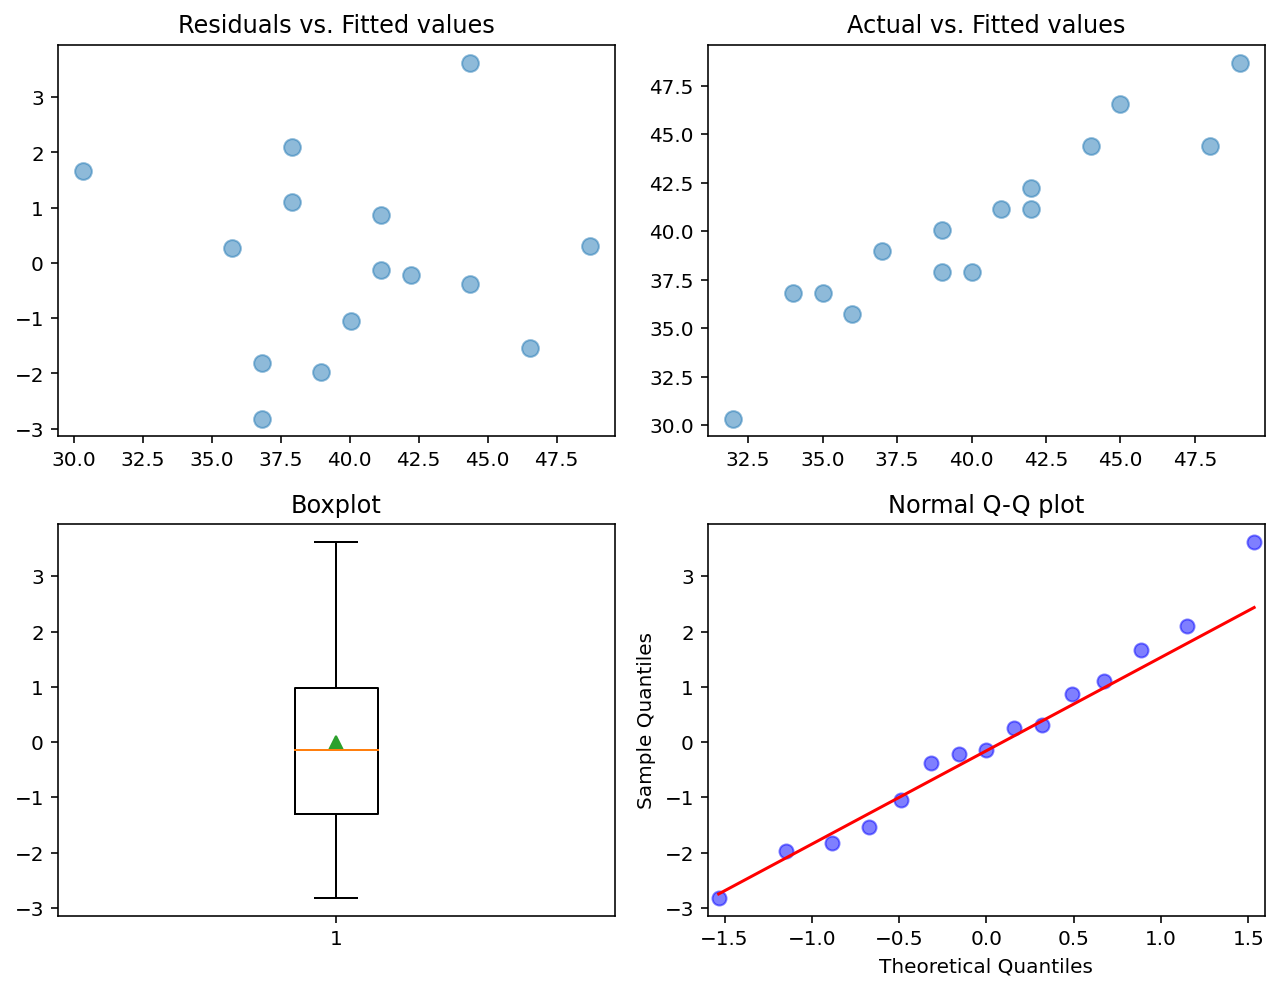

In [30]:
check_linreg_residuals(filament_lm)